## Grunnleggende eksempler på Pandas

Denne notatboken vil guide deg gjennom noen helt grunnleggende Pandas-konsepter. Vi starter med å importere typiske biblioteker for dataanalyse:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serier

Serier er som en liste eller en 1D-array, men med indeks. Alle operasjoner er justert etter indeksen.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


En av de vanligste bruksområdene for serier er **tidsserier**. I tidsserier har indeksen en spesiell struktur - vanligvis et utvalg av datoer eller tidspunkter. Vi kan opprette en slik indeks med `pd.date_range`.

Anta at vi har en serie som viser mengden av produktet som blir kjøpt hver dag, og vi vet at hver søndag må vi også ta ett produkt til oss selv. Slik kan vi modellere det ved hjelp av serier:


Length of index is 366


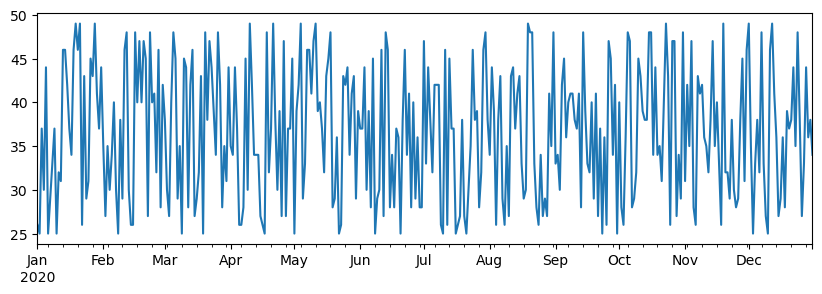

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Som du kan se, har vi problemer her, fordi i den ukentlige serien blir ikke-omtalte dager ansett som manglende (`NaN`), og å legge til `NaN` til et tall gir oss `NaN`. For å få riktig resultat, må vi spesifisere `fill_value` når vi legger til serier:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


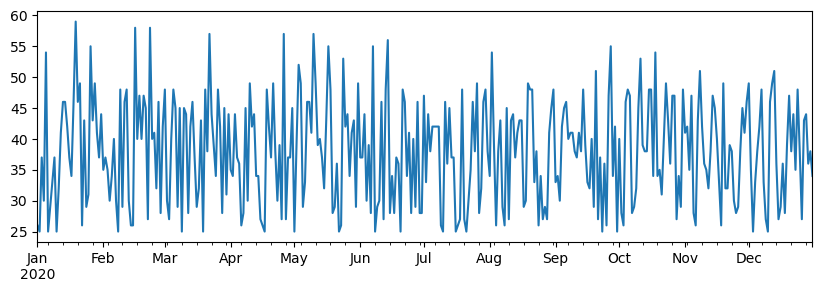

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

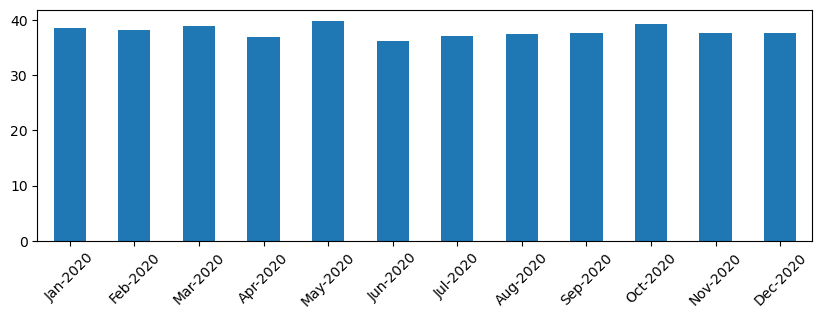

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

En dataframe er i hovedsak en samling av serier med samme indeks. Vi kan kombinere flere serier sammen til en dataframe. Gitt seriene `a` og `b` definert ovenfor:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Vi kan også bruke Series som kolonner og spesifisere kolonnenavn ved hjelp av ordbok:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Det samme resultatet kan oppnås ved å transponere (og deretter gi kolonnene nye navn for å matche det forrige eksempelet):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Velge kolonner** fra DataFrame kan gjøres slik:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Velge rader** basert på filteruttrykk:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Måten det fungerer på er at uttrykket `df['A']<5` returnerer en boolsk serie, som indikerer om uttrykket er `True` eller `False` for hvert element i serien. Når serien brukes som en indeks, returnerer den et delsett av rader i DataFrame. Dermed er det ikke mulig å bruke vilkårlige Python-boolske uttrykk, for eksempel, å skrive `df[df['A']>5 and df['A']<7]` ville vært feil. I stedet bør du bruke spesialoperasjonen `&` på boolske serier:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

Opprette nye beregnbare kolonner. Vi kan enkelt opprette nye beregnbare kolonner for DataFrame-en vår ved å bruke intuitive uttrykk. Koden nedenfor beregner avviket til A fra gjennomsnittsverdien.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Det som faktisk skjer er at vi beregner en serie, og deretter tilordner denne serien til venstre side, og oppretter en annen kolonne.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

Å velge rader basert på tall kan gjøres ved hjelp av `iloc`-konstruksjonen. For eksempel, for å velge de første 5 radene fra DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Gruppering** brukes ofte for å oppnå et resultat som ligner på *pivottabeller* i Excel. Anta at vi ønsker å beregne gjennomsnittsverdien av kolonnen `A` for hver gitt verdi av `LenB`. Da kan vi gruppere vår DataFrame etter `LenB`, og kalle `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Hvis vi trenger å beregne gjennomsnittet og antall elementer i gruppen, kan vi bruke en mer kompleks `aggregate`-funksjon:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Utskrift og visualisering

Dataforskere må ofte utforske dataene, og derfor er det viktig å kunne visualisere dem. Når en DataFrame er stor, ønsker vi ofte bare å forsikre oss om at vi gjør alt riktig ved å skrive ut de første radene. Dette kan gjøres ved å kalle `df.head()`. Hvis du kjører det fra Jupyter Notebook, vil det skrive ut DataFrame i et pent tabellformat.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Vi har også sett bruken av `plot`-funksjonen for å visualisere noen kolonner. Selv om `plot` er veldig nyttig for mange oppgaver og støtter mange forskjellige graf-typer via `kind=`-parameteren, kan du alltid bruke det grunnleggende `matplotlib`-biblioteket for å lage noe mer komplekst. Vi vil dekke datavisualisering i detalj i egne kursleksjoner.


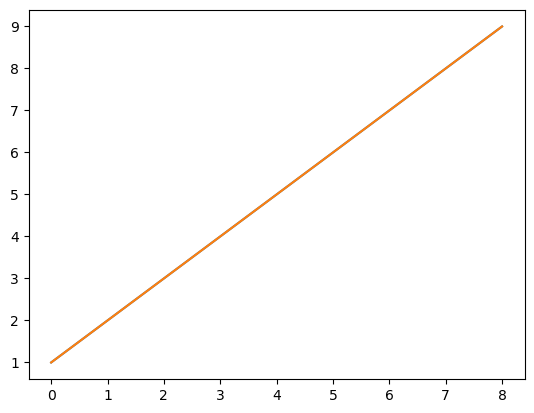

In [61]:
df['A'].plot()
plt.show()

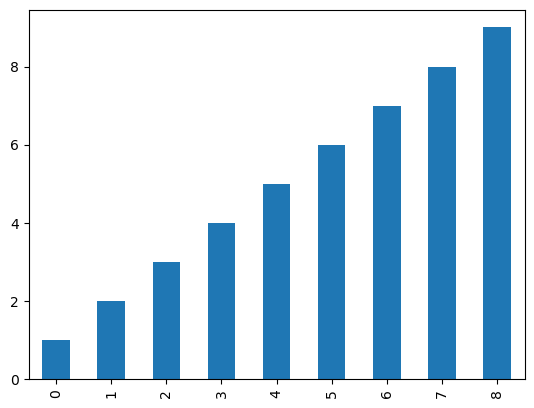

In [63]:
df['A'].plot(kind='bar')
plt.show()

Denne oversikten dekker de viktigste konseptene i Pandas, men biblioteket er svært omfattende, og det er ingen grenser for hva du kan gjøre med det! La oss nå bruke denne kunnskapen til å løse et spesifikt problem.



---

**Ansvarsfraskrivelse**:  
Dette dokumentet er oversatt ved hjelp av AI-oversettelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selv om vi tilstreber nøyaktighet, vennligst vær oppmerksom på at automatiske oversettelser kan inneholde feil eller unøyaktigheter. Det originale dokumentet på sitt opprinnelige språk bør anses som den autoritative kilden. For kritisk informasjon anbefales profesjonell menneskelig oversettelse. Vi er ikke ansvarlige for eventuelle misforståelser eller feiltolkninger som oppstår ved bruk av denne oversettelsen.
